# Ансамблевые модели

## Задача классификации 

В этом практическом задании вы научитесь работать с ансамблевыми моделями. Мы начнем с задачи классификации итальянского вина на предмет его пренадлежности к одному из трех видов. Загрузите датасет `Wine Data Database` с помощью функции `load_wine` из модуля `sklearn.datasets`.

In [1]:
from sklearn.datasets import load_wine

X, y = load_wine(return_X_y=True)

Модель случайного леса для классификации представлена классом `RandomForestClassifier` из модуля `sklearn.ensemble`. Конструктор этого класса содержит аргумент `n_estimators`, который соответствует колличеству базовых алгоритмов в случайном лесе. Целью этого задания будет настройка этого параметра. Сравните модели случайных лесов с различным числом базовых алгоритмов `{1, 5, 10, 20}`. Что происходит с качеством случайного леса на тестовых данных при увеличении этого числа? Ответом на это задание `answer1` является лучшая оценка качества модели, округленная до трех знаков после запятой. Используйте `accuracy` как метрику качества и скользящий контроль `cross_val_score` как метод оценки качества модели. Установите параметр `cv = StratifiedKFold(4)`. Возьмите среднее значение оценки качества. Для каждой из моделей случайного леса используете `random_state=42` при создании нового экземпляра.

### *РЕШЕНИЕ*

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

from matplotlib import pyplot as plt

In [4]:
%matplotlib inline

In [7]:
cv = StratifiedKFold(4)
n_estimators = [1, 5, 10, 20]
scores = []

for n in n_estimators:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X,y)
    cv_score = cross_val_score(model, X, y, cv=cv).mean()
    scores.append(cv_score)


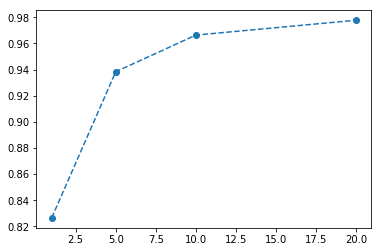

In [10]:
plt.plot(n_estimators, scores, '--o')
plt.show()

In [11]:
answer1 = round(max(scores), 3)

In [12]:
answer1

0.978

Далее сравните модель градиентного бустинга `GradientBoostingClassifier` из `sklearn.ensemble` с логистической регрессией `LogisticRegression` из `sklearn.linear_model` на этой выборке. Используете параметр `random_state=42` при создании экземпляров классов. Какая из моделей работает лучше? Приведите лучшую оценку, округленную до трех знаков после запятой, в качестве ответа `answer2` на это задание. Какие выводы из этого можно сделать?

### *РЕШЕНИЕ*

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [16]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)
cv_scores_lg = cross_val_score(log_reg, X, y, cv=cv).mean()

/home/yanina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yanina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/yanina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yanina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/yanina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/lo

In [17]:
grad_boost = GradientBoostingClassifier(random_state=42)
grad_boost.fit(X, y)
cv_scores_gb = cross_val_score(grad_boost, X, y, cv=cv).mean()

In [18]:
print(f'LG: {cv_scores_lg}, GB: {cv_scores_gb}')

LG: 0.9611111111111111, GB: 0.9275193798449612


In [19]:
answer2 = round(max(cv_scores_lg, cv_scores_gb), 3)

## Задача регрессии

Загрузите уже известную вам выборку `Boston House Prices` и разделите ее случайным образом на тренировочную и тестовую выборку. Для этого используете функцию `train_test_split` с параметрами `random_state=54` и `test_size=0.33`. Мы будем сравнивать 4 модели: `RandomForestRegressor`, `GradientBoostingRegressor` из `sklearn.ensemble`, а так же Гребневую регрессию и ЛАССО (`Ridge`, `Lasso` из `sklearn.linear_model`). Обучите каждую модель на тренировочной выборке с параметром `random_state=42` в конструкторе. Какая из моделей показывает наименьшее значение среднеквадратической ошибки на тестовых данных? В качестве ответа `answer3` приведите это значение, округленное до двух цифр после запятой.

### *РЕШЕНИЕ*

In [20]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [21]:
data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=54, test_size=0.33)

In [22]:
models = [RandomForestRegressor, GradientBoostingRegressor, Ridge, Lasso]
models_names = ['RandomForestRegressor', 'GradientBoostingRegressor', 'Ridge', 'Lasso']
MSEs = []

for m in models:
    model = m(random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    MSEs.append(MSE)

/home/yanina/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


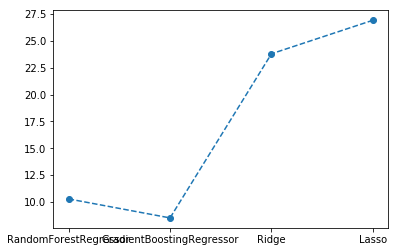

In [23]:
plt.plot(models_names, MSEs, '--o')
plt.show()

In [24]:
answer3 = round(min(MSEs), 2)

# Строка с ответами

In [25]:
output = """Best score (random forest) {0:.3f}
Best score (other algorithms) {1:.3f}
Best score (regression) {2:.2f}"""
print(output.format(answer1, answer2, answer3))

Best score (random forest) 0.978
Best score (other algorithms) 0.961
Best score (regression) 8.51
